<a href="https://colab.research.google.com/github/adityahridaysahu/Solar-Physics-Data-Analysis-using-Python/blob/main/SunPy_Demo_Edge_Enhancing_Coronal_Loops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "sunpy[all]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

AIA20110607_063302_0171_lowres.fits:   0%|          | 0.00/973k [00:00<?, ?B/s]

In [ ]:
aia = sunpy.map.Map(AIA_171_IMAGE)
bottom_left = SkyCoord(750 * u.arcsec, -200 * u.arcsec, frame=aia.coordinate_frame)
top_right = SkyCoord(1500 * u.arcsec, 550 * u.arcsec, frame=aia.coordinate_frame)
aia_smap = aia.submap(bottom_left, top_right=top_right)

In [ ]:
sx = ndimage.sobel(aia_smap.data, axis=0, mode='constant')
sy = ndimage.sobel(aia_smap.data, axis=1, mode='constant')
edge_enhanced_im = np.hypot(sx, sy)

In [ ]:
edge_map = sunpy.map.Map(edge_enhanced_im, aia_smap.meta)

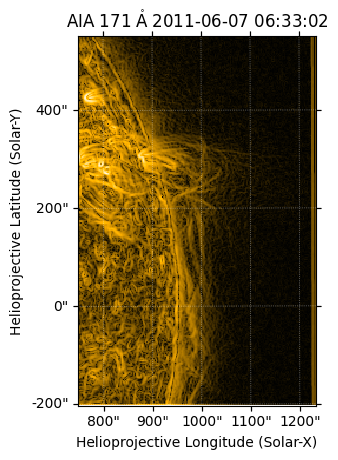

In [ ]:
plt.figure()
edge_map.plot()
plt.show()